# Introduction to Data Mining
## Practical 3 excercises

### Part 1: Planning
1\. The owner of a shop selling products for kitchen renovations, her name is Lin, decides that she should extend the range of products she offers to also sell homeware products (e.g. decorations, baskets, glassware, pictures etc). Having had success using customer data to build predictive models to guide direct mail campaigns for special product offers, she considers that data mining could help her to identify a subset of customers who should be good prospects for the new set of products. Is Lin ready to solve this as a supervised learning problem? What would you suggest as the target variable? Be precise. Is there anything else that you would recommend that Lin do to achieve her business goal? 

**My Answer:**
1. Yes, this problem can be solved by supervised learning. 
2. Lin may see this as a classification problem and try to use decision tree, logistic regression or other classifier to classify her customers, than find out those who may have interest in buying her homeware products. 
3. I would suggest to use the send-mail-or-not binary varible as the target variable. Based on historic data, she can devide her customers into those who is likely to be attracted by special offer and those who isn't. Thus, she can send offer to the former.
4. After her range of products extends, she can also try to use regression on the sales of her products, in order to predict what item will sells better and should be prepared in advance.

***

### Part 2: Evaluation Metrics
Answer each of the following questions. 

1\. What are problems with using accuracy to evaluate the performance of a model? 

**My Answer:**
1. You hardly know what accuracy can be considered as good for a model.
2. If the data is not selected correctly, the result of random choosing may already be good enough. (Null Error Rate)
3. Accuracy can not describe the quality of the model thoroughly. A model may have a high accuracy with a high FN rate, and this may be unacceptable for fields like idenitify checking.

2\. Describe k-fold cross validation. What are some of it's advantages when compared to a simple, single hold-out data set. Are there any disadvantages you can think of? 

**My Answer:**

K-fold cross validation: Take the data set and seperate it into k parts equally. For each part, take the part itself as the test set and the rest as the training set. Training a new model with the training set and evaluate it with the test set. Repeat this process for each part, and you will get K different models. Then you can compare their performance and choose the best one.

Advantage: Make use of the most of the data. Have a higher possibility to construct a better model.

Disadvantage: Takes more time and resource. The process is rather complicated.

***

### Part 2: Data

The data consists of a mail response data set from a direct marketing campaign. It is located in `data/mailing.csv`. Each record (row) refers to an individual who was targeted with a direct marketing offer. The offer was for the individual to make a charitable donation. 

The columns (features/attributes) are as follows:

```
Col.  Name      Description
----- --------- ----------------------------------------------------------------
1     income    household income
2     Firstdate data assoc. with the first gift by this individual
3     Lastdate  data associated with the most recent gift 
4     Amount    average amount by this individual over all periods (incl. zeros)
5     rfaf2     frequency code
6     rfaa2     donation amount code
7     pepstrfl  flag indicating a star donator
8     glast     amount of last gift
9     gavr      amount of average gift
10    class     one if they gave in this campaign and zero otherwise.
```

In this practical the goal is to build a model to predict if people will give to the charitable cause during the current campaign (this is the attribute `"class"` which has a value of 1 if they gave money and 0 if they did not).

First read the data in and put the target variable in `Y` and the features in `X`.

In [1]:
import pandas as pd

# Read data using pandas
data = pd.read_csv("data/mailing.csv")

# Split into X and Y
X = data.drop(['class'], 1)
Y = data['class']

In [6]:
X.describe()

,Income,Firstdate,Lastdate,Amount,rfaf2,glast,gavr,rfaa2_G,rfaa2_E,rfaa2_F,pepstrfl_0
count,191779.000000,191779.000000,191779.000000,191779.000000,191779.000000,191779.000000,191779.000000,191779.000000,191779.000000,191779.000000,191779.000000
mean,3.024142,9136.559602,9548.173189,0.174714,1.908113,17.391972,13.347193,0.202707,0.226172,0.493448,0.525975
std,2.300465,319.234876,49.376614,0.098978,1.072415,28.380052,10.138503,0.402017,0.418353,0.499958,0.499326
min,0.000000,0.000000,9503.000000,0.020000,1.000000,0.000000,1.280000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8811.000000,9509.000000,0.100000,1.000000,10.000000,8.400000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,9201.000000,9512.000000,0.150000,1.000000,15.000000,11.660000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,9409.000000,9602.000000,0.220000,3.000000,20.000000,15.500000,0.000000,0.000000,1.000000,1.000000
max,7.000000,9603.000000,9702.000000,1.760000,4.000000,10000.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


### Modelling and Learning Curve

Create a decision tree (use entropy) and fit it and use it on **all** of the data.

In [8]:
# Import decision trees and logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Import train, test, and evaluation functions
from sklearn.metrics import accuracy_score

# Create an object to learn the classifier (it is not fitted or learned at this stage)
tree = DecisionTreeClassifier(criterion="entropy")

# Fit the model
tree.fit(X, Y)

# Get prediction on all data
Y_predicted = tree.predict(X)

# Get the accuracy over the dataset and compare to the actual points
accuracy = accuracy_score(Y_predicted, Y)

# Print the accuracy
print ("The accuracy is " + str(accuracy))

The accuracy is 0.995646030066


That's high accuracy... It may be overfitting to the data because no training data was used - test if the model performs on unseen data not used in training.

Create train and test sets of `X` and `Y` where we assign 70% of our data to training (ie 100 - 30 % for test).

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

Fit model just to training data

In [10]:

tree = DecisionTreeClassifier(criterion="entropy")

# Fit the tree on the training data
tree.fit(X_train, Y_train)

# Get a prediction from the tree on the test data
Y_test_predicted = tree.predict(X_test)

# Get the accuracy of this prediction
accuracy = accuracy_score(Y_test_predicted, Y_test)

# Print the accuracy
print ("The accuracy is " + str(accuracy))

The accuracy is 0.898825042584


Big difference - almost 10 percent. Which tree would you trust more to make predictions?

**My answer:** The latter one.

## Team Problem

Work in your project teams to answer this question.

Using the following code as a template try to measure the performance with different training data set sizes for the decision tree and a logistic regression model. 

Check the accuracy with percentages from 20% test data to 80% test data. 

Generate a plot that has percentages on the x-axis and accuracies on the y-axis. This is called a **learning curve**.

In [11]:
# Import matplotlib for plotting
import matplotlib.pylab as plt
%matplotlib inline

#### Learning curve

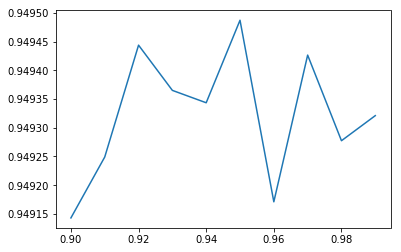

In [21]:
# Here are some percentages to get you started. Feel free to try more!
test_percentages = [0.99,0.98,0.97,0.96,0.95,0.94,0.93,0.92,0.91,0.90]
accuracies = []

for training_percentage in test_percentages:
    # Here I am training on 70%. What should I change this to so that I can try many percentages?
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=training_percentage)

    # This will create an empty logistic regression
    logistic = LogisticRegression()
    
    # This will fit/train your logistic regression
    logistic.fit(X_train,Y_train)
    
    # This will get predictions
    Y_test_predicted = logistic.predict(X_test)
    
    # With these predictions we can get an accuracy. Where should we store this accuracy?
    accuracies.append(accuracy_score(Y_test, Y_test_predicted))

# We want to plot our results. What list should we use for the x-axis? What about the y-axis?
plt.plot(test_percentages,accuracies)
plt.show()

#### Fitting curve

Generate a fitting curve by controlling the model complexity - tree depth.

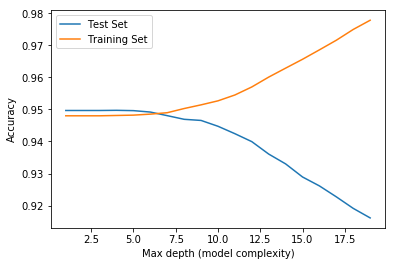

In [29]:
# Let's fit our training data size to 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.80)

# Let's try different max depths for a decision tree
max_depths = range(1, 20)
accuracies = []
train_accur = []

for max_depth in max_depths:
    # This will create an empty decision tree at a specified max depth
    tree = DecisionTreeClassifier(max_depth=max_depth)
    
    # This will fit/train your tree
    tree.fit(X_train, Y_train)
    
    # This will get accuracy and keep track of it
    Y_test_predicted = tree.predict(X_test)
    Y_train_predicated = tree.predict(X_train)
    accuracies.append(accuracy_score(Y_test_predicted, Y_test))
    train_accur.append(accuracy_score(Y_train_predicated, Y_train))

# We want to plot our results
# plt.plot(max_depths, accuracies，label='Test Set')
# plt.plot(max_depths, train_accur, label='Training Set')

plt.plot(max_depths, accuracies, label='Test Set')
plt.plot(max_depths, train_accur, label='Training Set')
plt.legend()

plt.ylabel("Accuracy")
plt.xlabel("Max depth (model complexity)")
plt.show()